We get a cardinal function if we use data that is one at a node and zero at the others. 

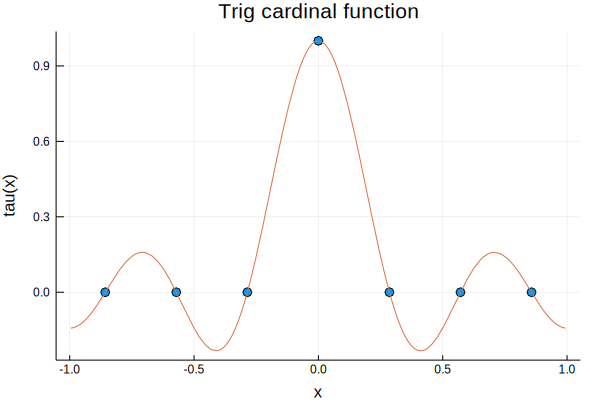

In [1]:
N = 7;  n = Int((N-1)/2);
t = @. 2*(-n:n)/N
y = zeros(N);  y[n+1] = 1;

using Plots
plot(t,y,m=:o,l=nothing,
    xaxis=("x"),yaxis=("tau(x)"),
    title="Trig cardinal function",leg=:none)

include("../FNC.jl")
p = FNC.triginterp(t,y)
plot!(p,-1,1)

Here is a 2-periodic function and one of its interpolants.

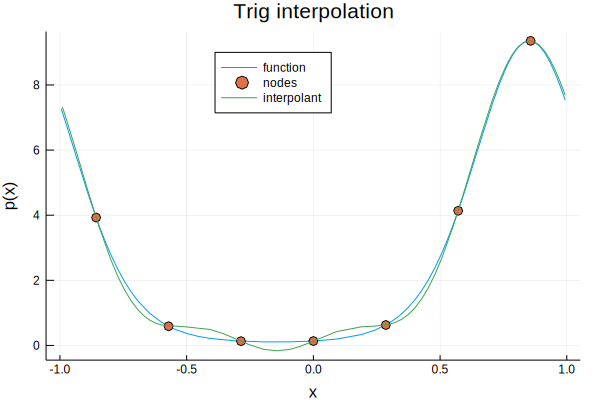

In [2]:
f = x -> exp(sin(pi*x)-2*cos(pi*x))

plot(f,-1,1,label="function",
    xaxis=("x"), yaxis=("p(x)"),
    title="Trig interpolation",leg=:top)  

y = f.(t);  plot!(t,y,m=:o,l=nothing,label="nodes")
plot!(FNC.triginterp(t,y),-1,1,label="interpolant")

The convergence of the interpolant is exponential (spectral). We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes.

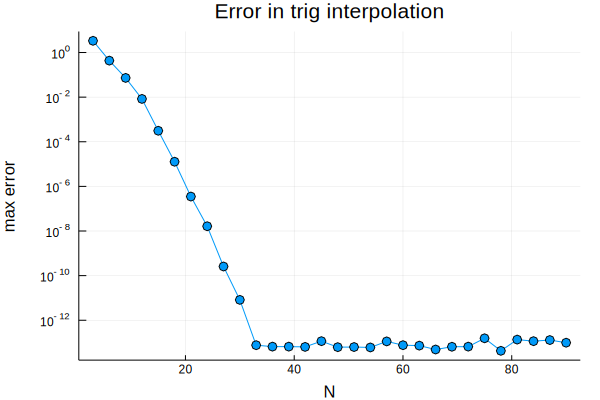

In [3]:
N = 3:3:90
err = zeros(size(N))

x = range(-1,stop=1,length=1601)  # for measuring error
for (k,N) = enumerate(N)
    n = (N-1)/2;   t = @. 2*(-n:n)/N;
    p = FNC.triginterp(t,f.(t))
    err[k] = maximum(@. abs(f(x)-p(x)) )
end

plot(N,err,m=:o,
    title="Error in trig interpolation",leg=:none,
    xaxis=("N"), yaxis=(:log10,"max error") )